In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import classify as kNN_classify

# Preparation - Analyze data from text file

|  | feature |
|---|---|
| didntLike | 1 |
| smallDoses | 2 |
| largeDoses | 3 |

In [3]:
feature_descript = {'didntLike' : 1, 'smallDoses' : 2, 'largeDoses' : 3}
feature_descript_re = {1 : 'didntLike', 2 : 'smallDoses', 3 : 'largeDoses'}

def file2matrix(filename):
    fr = None
    try:
        fr = open(filename)
        array_of_lines = fr.readlines()
    except:
        raise IOError
    finally:
        if fr:
            fr.close()   

    num_of_lines = len(array_of_lines)

    file_matrix = np.zeros((num_of_lines, 3))
    features = []
    index = 0

    for line in array_of_lines:
        line = line.strip()
        list_from_line = line.split('\t')

        file_matrix[index, :] = list_from_line[0:3]
        features.append(feature_descript[list_from_line[-1]])
        index += 1
    
    return file_matrix, features

In [4]:
dating_data_matrix, dating_features = file2matrix('datingTestSet.txt')

# Analysis - Plot data in 2D scatter plot

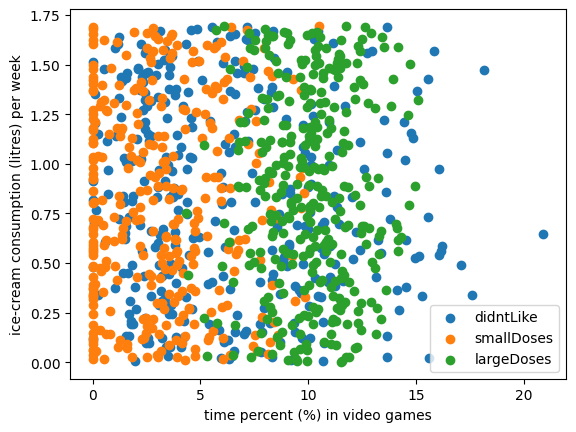

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

for feature in np.unique(dating_features):
    mask = dating_features == feature
    ax.scatter(dating_data_matrix[mask, 1], dating_data_matrix[mask, 2], label=feature_descript_re[feature])
    
ax.set_xlabel('time percent (%) in video games')
ax.set_ylabel('ice-cream consumption (litres) per week')
ax.legend()

plt.show()

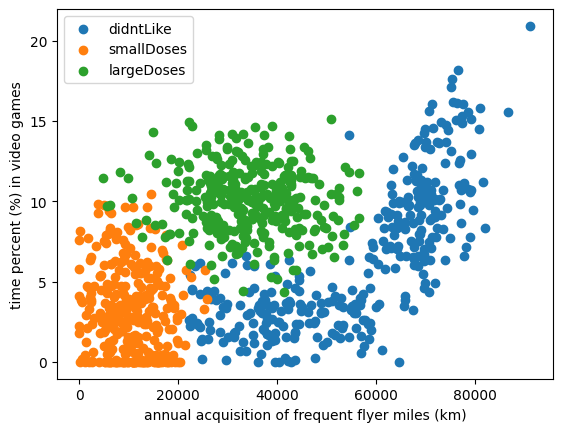

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

for feature in np.unique(dating_features):
    mask = dating_features == feature
    ax.scatter(dating_data_matrix[mask, 0], dating_data_matrix[mask, 1], label=feature_descript_re[feature])
    
ax.set_xlabel('annual acquisition of frequent flyer miles (km)')
ax.set_ylabel('time percent (%) in video games')
ax.legend()

plt.show()

# Preparation - Normalization values for each feature

In [7]:
def normalize(ds):
    data_offset = ds.min(0)
    data_range = ds.max(0) - data_offset
    return (ds - data_offset) / data_range, data_range, data_offset

In [8]:
dating_data_norm_matrix, dating_data_range, dating_data_offset = normalize(dating_data_matrix)
dating_data_norm_matrix, dating_data_range, dating_data_offset

(array([[0.44832535, 0.39805139, 0.56233353],
        [0.15873259, 0.34195467, 0.98724416],
        [0.28542943, 0.06892523, 0.47449629],
        ...,
        [0.29115949, 0.50910294, 0.51079493],
        [0.52711097, 0.43665451, 0.4290048 ],
        [0.47940793, 0.3768091 , 0.78571804]]),
 array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00]),
 array([0.      , 0.      , 0.001156]))

# Unit Test

In [9]:
dating_data_nums = dating_data_matrix.shape[0]
ho_ratio = 0.07
num_test_vecs = int(dating_data_nums * ho_ratio)
error_count = 0

for i in range(num_test_vecs):
    classifier_result = kNN_classify.classify(
        dating_data_norm_matrix[i, :],
        dating_data_norm_matrix[num_test_vecs:dating_data_nums, :],
        dating_features[num_test_vecs:dating_data_nums],
        k=3)
    print(
        f"the classifier came back with {classifier_result}\n" +
        f"the real answer is {dating_features[i]}\n"
    )
    if classifier_result != dating_features[i] :
        error_count += 1

error_rate = np.divide(np.float64(error_count), np.float64(num_test_vecs))
print(f"the total error rate is {np.multiply(np.float64(100), error_rate):.2f}%")
    

the classifier came back with 3
the real answer is 3

the classifier came back with 2
the real answer is 2

the classifier came back with 1
the real answer is 1

the classifier came back with 1
the real answer is 1

the classifier came back with 1
the real answer is 1

the classifier came back with 1
the real answer is 1

the classifier came back with 3
the real answer is 3

the classifier came back with 3
the real answer is 3

the classifier came back with 1
the real answer is 1

the classifier came back with 3
the real answer is 3

the classifier came back with 1
the real answer is 1

the classifier came back with 1
the real answer is 1

the classifier came back with 2
the real answer is 2

the classifier came back with 1
the real answer is 1

the classifier came back with 1
the real answer is 1

the classifier came back with 1
the real answer is 1

the classifier came back with 1
the real answer is 1

the classifier came back with 1
the real answer is 1

the classifier came back wit

# Build - Encapsulate algorithm code

In [10]:
def classify_api(feature1:np.float64, feature2:np.float64, feature3:np.float64):
    inX = np.array([feature1, feature2, feature3])
    inX_norm = (inX - dating_data_offset) / dating_data_range
    return kNN_classify.classify(inX_norm, dating_data_norm_matrix, dating_features, 3)

In [11]:
feature1 = np.float64(eval(input("annual acquisition of frequent flyer miles (km) = ")))
feature2 = np.float64(eval(input("time percent (%) in video games = ")))
feature3 = np.float64(eval(input("ice-cream consumption (litres) per week = ")))

feature_word = {1 : 'not at all', 2 : 'in small doses', 3 : 'in large doses'}

classify_result = classify_api(feature1, feature2, feature3)
print(f'You will probably like this person {feature_word[classify_result]}')

You will probably like this person in large doses
